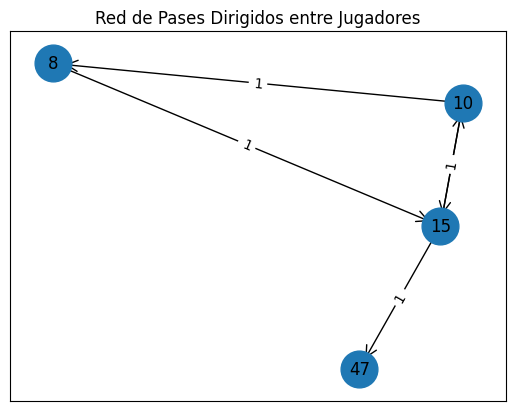

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '05_normal_short_1_passes.csv'  # Reemplaza esto con la ruta a tu archivo
passes_df = pd.read_csv(file_path)

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos (jugadores)
players = set(passes_df['Passer (id)']).union(set(passes_df['Receiver (id)']))
G.add_nodes_from(players)

# Agregar aristas (pases dirigidos) y contar el número de pases
for _, row in passes_df.iterrows():
    passer = row['Passer (id)']
    receiver = row['Receiver (id)']
    if G.has_edge(passer, receiver):
        G[passer][receiver]['weight'] += 1
    else:
        G.add_edge(passer, receiver, weight=1)

# Dibujar el grafo
pos = nx.spring_layout(G)  # Posiciones de los nodos

# Dibujar nodos
nx.draw_networkx_nodes(G, pos, node_size=700)

# Dibujar etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Dibujar aristas y sus etiquetas
edges = G.edges(data=True)
edge_labels = {(u, v): d['weight'] for u, v, d in edges}
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title('Red de Pases Dirigidos entre Jugadores')
plt.show()
